In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle

In [6]:
chef = pd.read_csv('metrics_data/chef_metrics.csv')
cloud_controller = pd.read_csv('metrics_data/cloud_controller_ng_metrics.csv')
cloudify = pd.read_csv('metrics_data/cloudify_metrics.csv')
gradle = pd.read_csv('metrics_data/gradle_metrics copy 2.csv')
jruby = pd.read_csv('metrics_data/jruby_yy_metrics.csv')
opal = pd.read_csv('metrics_data/opal_metrics copy.csv')
orbeon = pd.read_csv('metrics_data/orbeon-forms_metrics.csv')
vagrant = pd.read_csv('metrics_data/vagrant_metrics.csv')

In [7]:
chef.drop('num_commits', inplace=True, axis=1)
chef.drop('reviewer_experience', inplace=True, axis=1)
chef.drop('num_of_reviewers', inplace=True, axis=1)
cloudify.drop('num_commits', inplace=True, axis=1)
cloudify.drop('reviewer_experience', inplace=True, axis=1)
cloudify.drop('num_of_reviewers', inplace=True, axis=1)
cloud_controller.drop('num_commits', inplace=True, axis=1)
cloud_controller.drop('reviewer_experience', inplace=True, axis=1)
cloud_controller.drop('num_of_reviewers', inplace=True, axis=1)
gradle.drop('num_commits', inplace=True, axis=1)
gradle.drop('reviewer_experience', inplace=True, axis=1)
gradle.drop('num_of_reviewers', inplace=True, axis=1)
jruby.drop('num_commits', inplace=True, axis=1)
jruby.drop('reviewer_experience', inplace=True, axis=1)
jruby.drop('num_of_reviewers', inplace=True, axis=1)
opal.drop('num_commits', inplace=True, axis=1)
opal.drop('reviewer_experience', inplace=True, axis=1)
opal.drop('num_of_reviewers', inplace=True, axis=1)
orbeon.drop('num_commits', inplace=True, axis=1)
orbeon.drop('reviewer_experience', inplace=True, axis=1)
orbeon.drop('num_of_reviewers', inplace=True, axis=1)
vagrant.drop('num_commits', inplace=True, axis=1)
vagrant.drop('reviewer_experience', inplace=True, axis=1)
vagrant.drop('num_of_reviewers', inplace=True, axis=1)

In [8]:
def output_values(X_t, Y_data):
    Y_t = []
    for e in X_t['tr_build_id']:
        y_index = list(Y_data['tr_build_id']).index(e)
        if Y_data['tr_status'][y_index] == 'passed':
            Y_t.append(1)
        else:
            Y_t.append(0) 
    return Y_t

In [9]:
res_chef = pd.read_csv('../data/chef.csv')
res_cloud_controller = pd.read_csv('../data/cloud_controller_ng.csv')
res_cloudify = pd.read_csv('../data/cloudify.csv')
res_gradle = pd.read_csv('../data/gradle.csv')
res_jruby = pd.read_csv('../data/jruby.csv')
res_opal = pd.read_csv('../data/opal.csv')
res_orbeon = pd.read_csv('../data/orbeon-forms.csv')
res_vagrant = pd.read_csv('../data/vagrant.csv')

y_chef = output_values(chef, res_chef)
y_cloud_controller = output_values(cloud_controller, res_cloud_controller)
y_cloudify = output_values(cloudify, res_cloudify)
y_gradle = output_values(gradle, res_gradle)
y_jruby = output_values(jruby, res_jruby)
y_opal = output_values(cloudify, res_cloudify)
y_gradle = output_values(gradle, res_gradle)
y_jruby = output_values(jruby, res_jruby)

In [33]:
cloud_controller = pd.read_csv('metrics_data/cloud_controller_ng_metrics.csv')
res_cloud_controller = pd.read_csv('../data/cloud_controller_ng.csv')
y_cloud_controller = output_values(cloud_controller, res_cloud_controller)

In [87]:
geoserver = pd.read_csv('metrics_data/geoserver_metrics.csv')
res_geoserver = pd.read_csv('../data/geoserver.csv')
y_geoserver = output_values(geoserver, res_geoserver)

In [88]:
input_data = geoserver
result_data = y_geoserver

In [89]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

In [90]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [91]:



forest = RandomForestClassifier()

In [92]:
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [93]:
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
accuracy_score(y_test, y_pred_test)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


0.7934990439770554

In [94]:
#print(grid_search.cv_results_['params'])
#print(grid_search.cv_results_['mean_test_score'])

In [95]:


with open('geoserver_hybrid_model.pkl', 'wb') as save_file:
    pickle.dump(grid_search.cv_results_['params'], save_file)
    pickle.dump(grid_search.cv_results_['mean_test_score'], save_file)
    pickle.dump(X_train, save_file)
    pickle.dump(X_test, save_file)
    pickle.dump(y_train, save_file)
    pickle.dump(y_test, save_file)
    pickle.dump(y_pred_test, save_file)

In [96]:
x = grid_search.cv_results_['params']
y = (grid_search.cv_results_['mean_test_score'] * 100).tolist()

column_names = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'n_estimators']
df = pd.DataFrame(x, columns = column_names)
df['accuracy'] = y

max_depth
10.0     AxesSubplot(0.125,0.125;0.775x0.755)
35.0     AxesSubplot(0.125,0.125;0.775x0.755)
60.0     AxesSubplot(0.125,0.125;0.775x0.755)
85.0     AxesSubplot(0.125,0.125;0.775x0.755)
110.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: accuracy, dtype: object

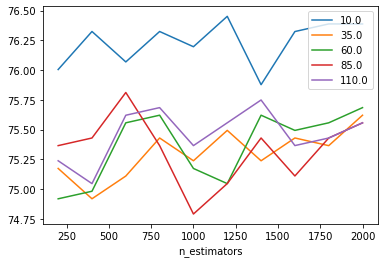

In [97]:
plot_1 = df[(df['min_samples_split']==2) & (df['min_samples_leaf']==1)]
plot_1.set_index('n_estimators', inplace=True)
plot_1.groupby('max_depth')['accuracy'].plot(legend=True)

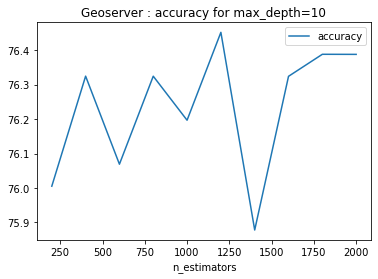

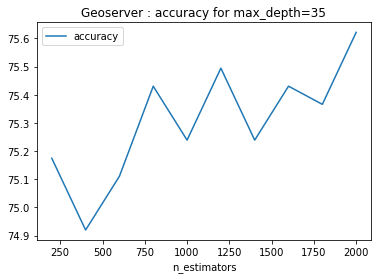

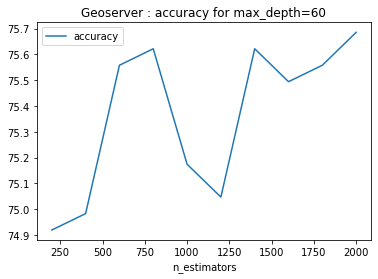

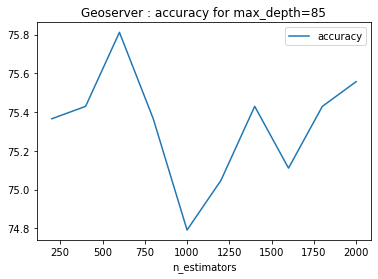

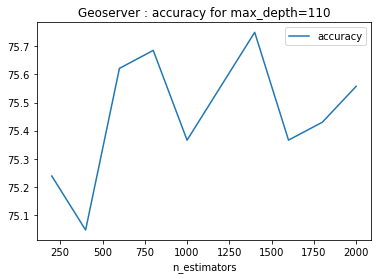

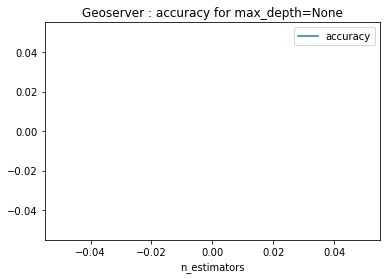

In [98]:
for d in max_depth:
    data = df[(df['min_samples_split']==2) & (df['min_samples_leaf']==1) & (df['max_depth']==d)]
    title = 'Geoserver : accuracy for max_depth={}'.format(d)
    data.plot(x='n_estimators',y='accuracy', title=title)

In [99]:
load_file = open('geoserver_hybrid_model.pkl', 'rb')
cv_results_params = pickle.load(load_file)
cv_results_mts = pickle.load(load_file)
load_x_train = pickle.load(load_file)
load_x_test = pickle.load(load_file)
load_y_train = pickle.load(load_file)
load_y_test = pickle.load(load_file)
load_y_pred_test = pickle.load(load_file)

In [100]:
total_builds = 0
build_time = 0

cur_batch = []
batch_results = []
hybrid_duration = []
actual_duration = []
max_batch_size = 4

input_dataset = res_geoserver
build_ids = input_dataset['tr_build_id'].tolist()
durations = input_dataset['tr_duration'].tolist()
num = 0
test_build_ids = load_x_test['tr_build_id'].tolist()
actual_results = input_dataset['tr_status'].tolist()
for i in range(len(load_y_pred_test)):
    a = test_build_ids[i]
    b = build_ids.index(a)
    c = durations[b]
    actual_duration.append(durations[build_ids.index(test_build_ids[i])])
    
    if load_y_pred_test[i] == 0:
        if len(cur_batch) < max_batch_size:
            cur_batch.append(test_build_ids[i])
            batch_results.append(actual_results[build_ids.index(test_build_ids[i])])
        
        if len(cur_batch) == max_batch_size:
            batch_duration = []
            for b in cur_batch:
                batch_duration.append(durations[build_ids.index(b)])
            d = max(batch_duration)
            num += 1
            if 'failed' or 'errored' in batch_results:
                d += sum(batch_duration)
                num += 4
            
            cur_batch.clear()
            batch_results.clear()
            hybrid_duration.append(d)

if len(cur_batch) != 0:
    batch_duration = []
    for b in cur_batch:
        batch_duration.append(durations[build_ids.index(b)])
    d = max(batch_duration)
    num += 1
    if 'failed' or 'errored' in batch_results:
        d += sum(batch_duration)
        num += len(cur_batch)
    hybrid_duration.append(d)

In [101]:
h = sum(hybrid_duration)
a = sum(actual_duration)
savings = 100*(a-h)/a
print(savings)

43.21994286739244


In [102]:
t = len(actual_duration)
print(t)
print(num)
number_of_builds_saved = 100*(t-num)/t
print(number_of_builds_saved)

523
302
42.25621414913958


In [103]:
flag = 0
count = 0
delay = []
for i in range(len(load_y_pred_test)):
    if flag == 1:
        if load_y_pred_test[i] == 1
            count += 1
        if load_y_pred_test[i] == 0:
            delay.append(count)
            count = 0
            flag = 0
    if load_y_test[i] == 0:
        if load_y_pred_test[i] == 1:
            flag = 1

delay.append(count)

In [105]:
print(sum(delay))

47
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; t

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; tot

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; to

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; t

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=600; 

In [56]:
print(y_pred_test.tolist())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [57]:
print(y_test)

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 

In [74]:
load_file = open('../../hybrid/rq2_test_result.pkl', 'rb')
load_x_train = pickle.load(load_file)
load_x_test = pickle.load(load_file)
load_y_train = pickle.load(load_file)
load_y_test = pickle.load(load_file)
load_y_pred_test = pickle.load(load_file)

In [76]:
total_builds = 0
build_time = 0

cur_batch = []
batch_results = []
hybrid_duration = []
actual_duration = []
max_batch_size = 4

input_dataset = res_chef.append(res_cloud_controller.append(res_cloudify.append(res_gradle.append(res_jruby))))

build_ids = input_dataset['tr_build_id'].tolist()
durations = input_dataset['tr_duration'].tolist()
num = 0
test_build_ids = load_x_test['tr_build_id'].tolist()
actual_results = input_dataset['tr_status'].tolist()
for i in range(len(load_y_pred_test)):
    a = test_build_ids[i]
    b = build_ids.index(a)
    c = durations[b]
    actual_duration.append(durations[build_ids.index(test_build_ids[i])])
    
    if load_y_pred_test[i] == 0:
        if len(cur_batch) < max_batch_size:
            cur_batch.append(test_build_ids[i])
            batch_results.append(actual_results[build_ids.index(test_build_ids[i])])
        
        if len(cur_batch) == max_batch_size:
            batch_duration = []
            for b in cur_batch:
                batch_duration.append(durations[build_ids.index(b)])
            d = max(batch_duration)
            num += 1
            if 'failed' or 'errored' in batch_results:
                d += sum(batch_duration)
                num += 4
            
            cur_batch.clear()
            batch_results.clear()
            hybrid_duration.append(d)

if len(cur_batch) != 0:
    batch_duration = []
    for b in cur_batch:
        batch_duration.append(durations[build_ids.index(b)])
    d = max(batch_duration)
    num += 1
    if 'failed' or 'errored' in batch_results:
        d += sum(batch_duration)
        num += len(cur_batch)
    hybrid_duration.append(d)

In [77]:
h = sum(hybrid_duration)
a = sum(actual_duration)
savings = 100*(a-h)/a
print(savings)

26.8111046254078


In [78]:
t = len(actual_duration)
print(t)
print(num)
number_of_builds_saved = 100*(t-num)/t
print(number_of_builds_saved)

4261
1492
64.98474536493781


In [79]:
flag = 0
count = 0
delay = []
for i in range(len(load_y_pred_test)):
    if flag == 1:
        if load_y_pred_test[i] == 1:
            count += 1
        if load_y_pred_test[i] == 0:
            delay.append(count)
            count = 0
            flag = 0
    if load_y_test[i] == 0:
        if load_y_pred_test[i] == 1:
            flag = 1

delay.append(count)
print(delay)

[1, 0, 8, 0, 0, 1, 1, 10, 2, 1, 6, 5, 0, 0, 0, 9, 0, 2, 4, 0, 0, 3, 2, 0, 3, 0, 3, 0, 5, 2, 0, 7, 3, 0, 3, 4, 2, 2, 4, 5, 3, 6, 0, 14, 0, 11, 2, 2, 3, 0, 0, 0, 4, 3, 2, 1, 1, 4, 0, 3, 2, 8, 1, 6, 1, 1, 0, 0, 2, 14, 1, 2, 0, 0, 4, 0, 2, 2, 2, 10, 1, 0, 0, 0, 2, 5, 1, 3, 2, 0, 6, 3, 2, 1, 3, 2, 3, 14, 0, 6, 1, 14, 8, 7, 6, 8, 0, 0, 4, 2, 0, 2, 2, 6, 4, 0, 5, 1, 6, 3, 3, 5, 5, 3, 2, 3, 12, 1, 2, 3, 2, 0, 4, 1, 0, 0, 0, 1, 6, 0, 0, 1, 3, 3, 0, 0, 2, 0, 6, 0, 4, 2, 4, 0, 0, 2, 1, 14, 3, 6, 2, 3, 5, 4, 2, 8, 5, 3, 6, 0, 2, 1, 4, 3, 9, 0, 0, 4, 3, 2, 3, 3, 0, 0, 0, 0, 1, 5, 0, 1, 4, 6, 0, 0, 1, 3, 1, 11, 2, 0, 0, 11, 0, 10, 14, 1, 1, 12, 2, 3, 1, 2, 1, 2, 3, 2, 7, 0, 1, 2, 0, 4, 1, 1, 0, 4, 1, 0, 2, 5, 6, 3, 8, 2, 0, 0, 0, 2, 0, 0, 1, 4, 4, 3, 1, 0, 10, 6, 9, 0, 0, 5, 2, 0, 0, 3, 3, 4, 1, 1, 1, 2, 0, 7, 1, 5, 11, 0, 6, 0, 0, 0, 0, 1, 1, 0, 2, 0, 4, 0, 5, 2, 2, 3, 0, 0, 3, 1, 4, 0, 0, 0, 2, 2, 11, 3, 4, 1, 3, 0, 0, 2, 7, 0, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2, 8, 3, 1, 2, 9, 3, 0, 0, 6, 3, 7, 0, 2, 1

In [80]:
print(sum(delay))

1012


In [82]:
print(len(load_y_pred_test))

4261


In [83]:
print(h)

19877285
